In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import func
from flask import Flask, jsonify
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [2]:
engine = create_engine("sqlite:///database/hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [4]:
Base.classes.keys()
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [5]:
session = Session(engine)
inspector = inspect(engine)

In [6]:
columns = inspector.get_columns('measurements')
for column in columns:
    print(column["name"], column["type"])

measurement_id INTEGER
station VARCHAR(255)
date VARCHAR(255)
prcp FLOAT
tobs FLOAT


In [7]:
columns = inspector.get_columns('stations')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station VARCHAR(255)
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Precipitation Analysis
results = session.query(
                        Measurement.date, Measurement.prcp) \
                        .filter(Measurement.date >= '2016-08-23')\
                        .order_by(Measurement.date.desc())

In [9]:
precip_df = pd.DataFrame(results[::], columns=['date','prcp'])
precip_df['prcp'] = precip_df['prcp'].astype('float64')
precip_df.set_index('date', inplace=True, )

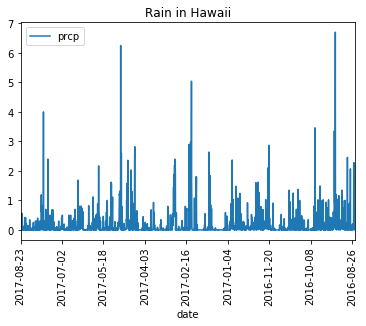

In [10]:
precip_df.iloc[::].plot(title="Rain in Hawaii")
plt.xticks(rotation='vertical')
plt.show()

In [11]:
#number of stations
station_count = session.query(Station).count()
station_count

9

In [12]:
active_stations = session.query(
                                Measurement.station, func.count(Measurement.date)) \
                                .group_by(Measurement.station) \
                                .order_by(func.count(Measurement.date).desc()).all()

In [13]:
stations_df = pd.DataFrame(active_stations, columns=['station','count'])
stations_df
#Station USC00519281 is the most active station

,station,count
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [14]:
results = session.query(
                        Measurement.date, Measurement.tobs) \
                        .filter(Measurement.date >= '2016-08-23') \
                        .filter(Measurement.station == 'USC00519281') \
                        .order_by(Measurement.date.desc())

In [15]:
tobs = []
for row in results:
    tobs.append(row[1])

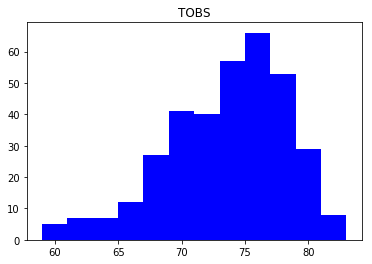

In [16]:
bins=12
plt.hist(tobs, bins=bins, color='blue')
plt.title('TOBS')
plt.show()

In [17]:
def calc_temps(start_date, end_date):
    results = session.query(
                        Measurement.date, Measurement.tobs) \
                        .filter(Measurement.date >= start_date) \
                        .filter(Measurement.date <= end_date) \
                        .order_by(Measurement.date.asc())
    temps_df = pd.DataFrame(results[::], columns=['date','temp'])
    min_temp = temps_df['temp'].min()
    max_temp = temps_df['temp'].max()
    avg_temp = temps_df['temp'].mean()
    x_tick = 'From ' + start_date + ' to ' + end_date
    plt.bar(x_tick, avg_temp, yerr=max_temp-min_temp, color='pink', width=.5)
    plt.title('Trip Avg Temp')
    plt.show()

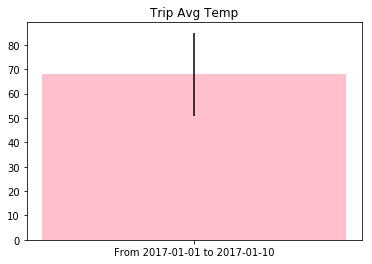

In [18]:
calc_temps('2017-01-01', '2017-01-10')